Entre algunos análisis que miro frecuentemente están los análisis de mercado, específicamente quantitive analysis(QA), es una rama muy amigable del análisis de mercado que creo que todos deberían conocer,  aporta un plus a la gestión tanto en el mercado financiero como en la vida diaria , por tal razón he decido realizar una series de guías de cómo utilizar e interpretar estás las herramientas estadísticas que tenemos a disposición para medir, modelar y comprender el comportamiento del mercado. 
Por ahora me planteo tres guías de iniciación, serán muy sencillas, son los primeros pasos que se realizan para los estudios de mercado.


- Obteniendo Data desde yahoo Finance 
- Herramientas básicas estadísticas (Desviación, Normalidad, skewness, Kurtosis y más)
- Introducción a la Optimización de Portafolio

Estás son las primeras guías que tengo en mente, algo que espero que tomen en cuenta es que utilizaré conceptos en inglés, por ejemplo no suelo decir "acciones", sino shares o equities, igual intentare traducir lo más que pueda, pero el material con el estudio es en inglés y no conozco todas las traducciones, igual en su defecto estaré explicando cada concepto.

Espero las guías sean de mucha utilidad, estaré avisando por mis redes cuando haga publicaciones, así que los invito a seguirme, esto lo hago porque me gusta sin embargo hay un botón de PayPal para quien quiera invitarme un café ya que es la forma de yo saber que hay gente muy interesada en lo que escribo.

Por último y más importante, cualquier comentario o opinión emitida aquí no es una recomendación ni sugerencia en cuanto a administrar su portafolio de inversión, cada quien es responsable de las desición que tome,sin más dilación comencemos.




En esta oportunidad tomare información de acciones del mercado venezolano para explicar como normalizo los precios al precio $ dado la inestabilidad que hay con el VEF, de esta forma se facilitan muchos cálculos, sin embargo, lo que quiero decir es que esto funciona para cualquier mercado que se encuentre en yahoo finance.

Para obtener información de las principales acciones ofertas en el mercado venezolano, se hara uso de la API de yahoo finance donde se encuentran registro de los precios historicos y actuales de cada de una de las acciones con las que se quiera comerciar,por otro lado, a la fecha de hoy venezuela sufre un periodo de crisis economica que mantiene una inestabilidad en la moneda nacional,lo cual no solo dificulta los calculos a nivel historico, es decir, hacer un analisis con data del 2018 hasta hoy en día puede sercasi imposible por la diferencia en el valor de la moneda.
Para el problema anterior estarizaremos y facilitar los calculos, estandarizamos los precios de los activos a precio de $, para conseguir historico cambiario del par USD/VEF, descargar el csv desde el 2018 [USD/VEF](https://www.investing.com/currencies/usd-vef-historical-data).

recuerda instalar las siguientes librerias

- !pip install pandas #libreria que ofrece un framework amigable para el manejo de tablas
- !pip numpy  #libreria para el manejo de operaciones matematicas
- !pip matplotlib  #libreria para graficar 
- !pip yfinance #API de yahoo finance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance  as yf

El primero paso que daremos consistira en hacer lectura de la archivo descargado desde investing,
la estructura de este archivo es basicamente un fecha, el precio promedio, el precio con que abre el mercado,
su valor más alto, su valor más bajo <<estos tres son iguales por alguna extraña razon>> y el porcentaje de cambio.


In [2]:
pd.read_csv('assets/USD_VES.csv', header=0, index_col=0, parse_dates=True )

,Price,Open,High,Low,Change %
Date,,,,,
2021-04-15,"2,375,839.2500","2,378,816.5000","2,378,816.5000","2,378,816.5000",2.88%
2021-04-14,"2,309,375.0000","2,312,269.0000","2,312,269.0000","2,312,269.0000",-0.85%
2021-04-13,"2,329,146.0000","2,332,064.7500","2,332,064.7500","2,332,064.7500",1.94%
2021-04-12,"2,284,762.0000","2,287,625.2500","2,287,625.2500","2,287,625.2500",2.44%
2021-04-09,"2,230,234.2500","2,233,029.0000","2,233,029.0000","2,233,029.0000",4.36%
...,...,...,...,...,...
2018-01-05,0.0001,0.0001,0.0001,0.0001,0.00%
2018-01-04,0.0001,0.0001,0.0001,0.0001,0.00%
2018-01-03,0.0001,0.0001,0.0001,0.0001,0.00%



Una configuración amigable para la lectura es, tomar la primera fila como los header que son los nombres de la columna, 
colocar la fecha como indice y indicarle que el indice es una fecha, ademas de eso indicaremos que solo necesitamos 
la columna de precio, ordenamos y renombramos la columna con un nombre más claro.


In [3]:
usdVEF = pd.read_csv('assets/USD_VES.csv', header=0, index_col=0, parse_dates=True )['Price']
usdVEF = pd.DataFrame(usdVEF.sort_index()) #ordenamos de manera ascendente
usdVEF.columns = ['Bs/USD$']  #renombramos la columna
usdVEF.tail()

,Bs/USD$
Date,
2021-04-09,"2,230,234.2500"
2021-04-12,"2,284,762.0000"
2021-04-13,"2,329,146.0000"
2021-04-14,"2,309,375.0000"
2021-04-15,"2,375,839.2500"


Ahora comencemos con lo bueno, haremos lectura de unas pocas acciones para entender el funcionamiento.
- 'BNC.CR' 
- 'MVZ-B.CR'
- 'CIE.CR' 
- 'FNC.CR'

primero creemos un DataFrame vacio, basicamente lo que haremos se empaquetar todos los datos allí, solo ten presente eso.
Haremos lectura con de nuestras shares con la funcion Ticker, esta se encuentra dentro de la liberia de yahoo finance, esta funcion prepara los datos para ser leidos es como "oye prepara la shares de BNC que va ser leida", 
una vez preparada hacemos lectura deacuerdo al periodo que queremos, por lo general mientras más datos tengas mejor, pero por ahora igual que con el par VEF/USD, aqui necesitamo solo el precio, y tomaremos solo 3 años de datos.

Esto funciona para un shares, pero ahora queremos varios por lo requeriremos hacer el recorrido varias veces,
además de eso queremos meter todo junto en una misma tabla, o concatenar todos los datos.

Meteré toda esta información en una función, una función nos facilitará mucho la vida, solo tendremos
que cambiar la lista de shares de la que queremos hacer lectura y función hará el mismo trabajo.

In [4]:
equities = ['PTN.CR', 'MVZ-B.CR', 'FNC.CR']
def data(shares):
    df = pd.DataFrame()
    for i in shares:
        read = yf.Ticker(i)
        hist = read.history(period="3y")['Close']
        data = pd.DataFrame(hist)
        data['Close'].columns = [i]
        data = data.loc[~data.index.duplicated(keep='first')]
        df = pd.concat([df, data], axis=1)
        
    df.columns = shares
    return df

In [5]:
df = data(equities)
df.head()

,PTN.CR,MVZ-B.CR,FNC.CR
Date,,,
2018-04-16,0.139857,24.606991,0.286
2018-04-17,0.139857,24.606991,0.340
2018-04-18,0.134862,29.528389,0.400
2018-04-19,0.134862,29.528389,0.400
2018-04-20,0.139857,29.528389,0.400


Ahora que tenemos los datos del precio del dolar y el precio de nuestras shares, uniremos todo para estandarizar los precios de las shares, esto simplemente es una idea de facilitar los calculos debido a la hiperinflación en la que se encuentra la economia en Venezuela lo que ocasiona una desvalorización de la moneda Bs y complica los calculos debido a la diferencia de precios.

Luego de unir los datos, limpearemos un poco nuestro jardin, el formato de bs/USD$ son interpreados como string, asi que modificaremos eso para poder trabajar con el valor, luego estandarizamos, divimos el precio de nuestra accion al precio del dolar del mismo día.
Por último, tenemos una diferencia en las fechas entre los dataframe, la fecha de VEF/USD esta desde el enero 2018, mientra que alguna de nuestras shares solo tenemos data a partir de abril, esas diferencia entre fechas es rellenada con valores NaN, estos valores indican la ausencia de datos, removeremos todas esas filas ya que no presetan información de los precios.


In [6]:
dfUSD = usdVEF.join(df)
dfUSD['Bs/USD$'] = dfUSD['Bs/USD$'].str.replace(',','').astype(np.float64)
dfUSD = dfUSD.iloc[:,1:].div(dfUSD['Bs/USD$'],axis=0).dropna(how='all')

In [7]:
dfUSD.describe()

,PTN.CR,MVZ-B.CR,FNC.CR
count,744.000000,744.000000,744.000000
mean,0.121614,11.345256,0.455251
std,0.215303,24.504737,0.374862
min,0.018838,0.907388,0.032763
25%,0.032810,2.236953,0.222391
50%,0.041672,3.191995,0.311285
75%,0.110085,4.872743,0.600751
max,1.083583,137.110170,1.972814


El primer concepto que revisaremos será el performance de la shares, en español se refiere al rendimiento o retorno.
Recordemos que el retorno para un tiempo $t$ a un tiempo ${t-1}$ esta dato por :

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}}$$

una alternativa muy común que veo en excel es usar esta.

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1$$

Secillamente le estamos pidiendo que compare el precio con un precio anterior y nos muestre el resultado en terminos de porcentaje.

Es una función sencilla pero antes de que intentes algo como este código,

```python

dfUSD.iloc[1:]/dfUSD.iloc[:-1].values - 1

```

recuerda necesitas forzar un lag en la serie de tiempo porque trabaja con un tiempo adelante, y de esa forma aunque el calculo esta bien planteado acorde al punto de referencia(tiempo) no estara bien ordenado, te invito a probar como ejercicio.

Para resolver este problema de periodos python tiene la función [shift()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html), esta función permite mover un paso adelante los registros, intetemos!.

In [14]:
FNC = dfUSD['FNC.CR']/dfUSD['FNC.CR'].shift(1) -1
FNC.head()

Date
2018-04-16         NaN
2018-04-17    0.188811
2018-04-18    0.176471
2018-04-19    0.000000
2018-04-20   -0.110995
Name: FNC.CR, dtype: float64

Entendiendo como funciona el calculo, y como puedes hacerlo por ti mismo, ahora te dare el camino fácil, es la función de python [ptc_change()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)

<cite>"Percentage change between the current and a prior element".</cite> esta es la definición que ofrece la documentación, justo lo que queremos, veamos si funciona.

In [15]:
FNCR = dfUSD['FNC.CR'].pct_change()
FNCR.head()

Date
2018-04-16         NaN
2018-04-17    0.188811
2018-04-18    0.176471
2018-04-19    0.000000
2018-04-20   -0.110995
Name: FNC.CR, dtype: float64

Perfecto! tenemos exactamente el mismo resultado que plantea la formula, podemos confiar en esta declaración, ahora veamos como podemos representar esos datos.


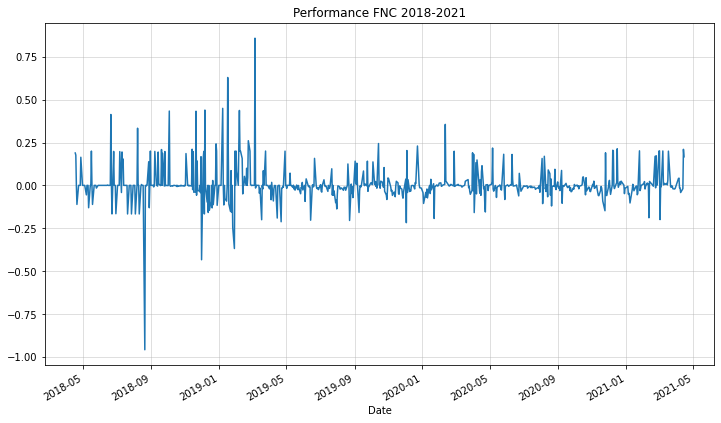

In [11]:
FNCR.plot(figsize=(12,7))
plt.grid(alpha=0.5)
plt.title('Performance FNC 2018-2021')
plt.show()

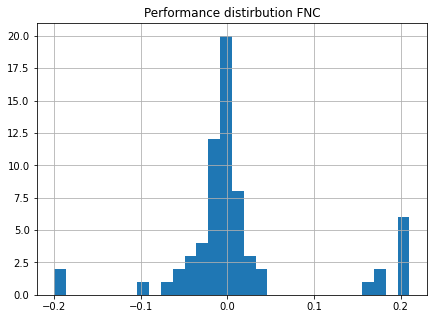

In [12]:
FNCR['2021':'2021'].hist(bins=30, figsize=(7,5))
plt.title('Performance distirbution FNC')
plt.show()

Por último quiero que miremos algo muy interesante, y es el indexado que seleccionamos al comienzo, esto también será mucha más utilidad más adelante cuando necesitemos comparar $t$ con ${t-n}$, no profundizare en eso ahora, simplemente quiero mostrar cómo con el índice podemos elegir los periodos de estudio, es algo muy sencillo,tenemos que seleccionar el periodo que queremos evaluar como se muestra en el  siguiente código.


```python
data['fecha inicio':'fecha final']....
```

Veamos si funciona.

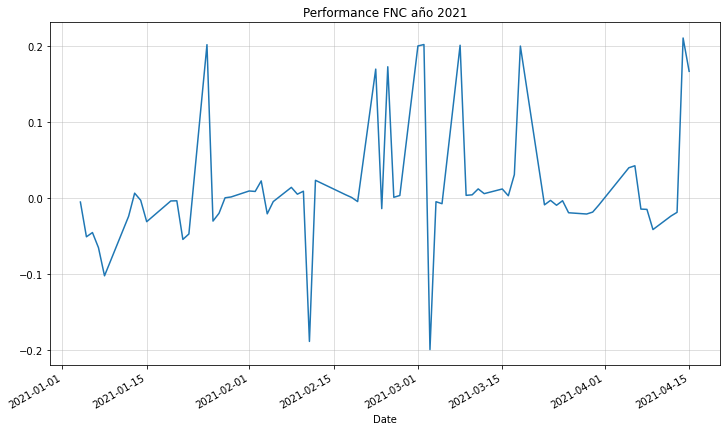

In [13]:
FNCR['2021':'2021'].plot(figsize=(12,7))
plt.grid(alpha=0.5)
plt.title('Performance FNC año 2021')
plt.show()

Esto puedes usarlo para graficar, en tablas y cálculos, una genialidad.

Bueno esto es todo por ahora, espero que haya sido muy ilustrativo y que hayas aprendido bastante, sin más que decirte espero verte en la segunda parte de este mini-turorial.
